### PROJET 5 : Catégorisez automatiquement des questions

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import re
import spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd
import time


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## CSV File

In [10]:
df_query = pd.read_csv("./data/QueryResults.csv")

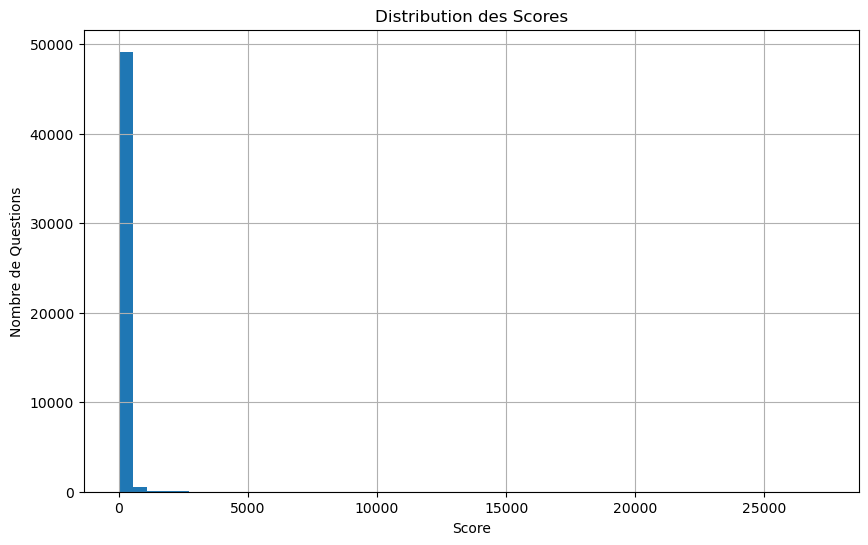

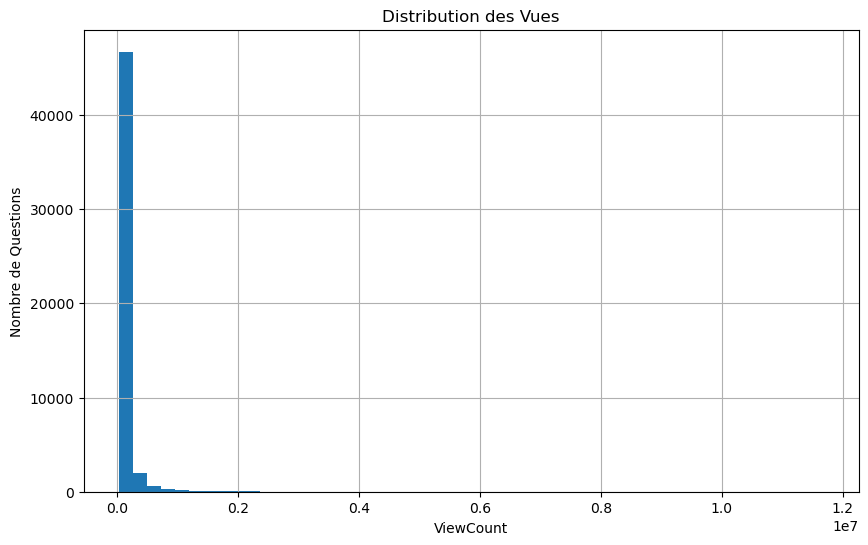

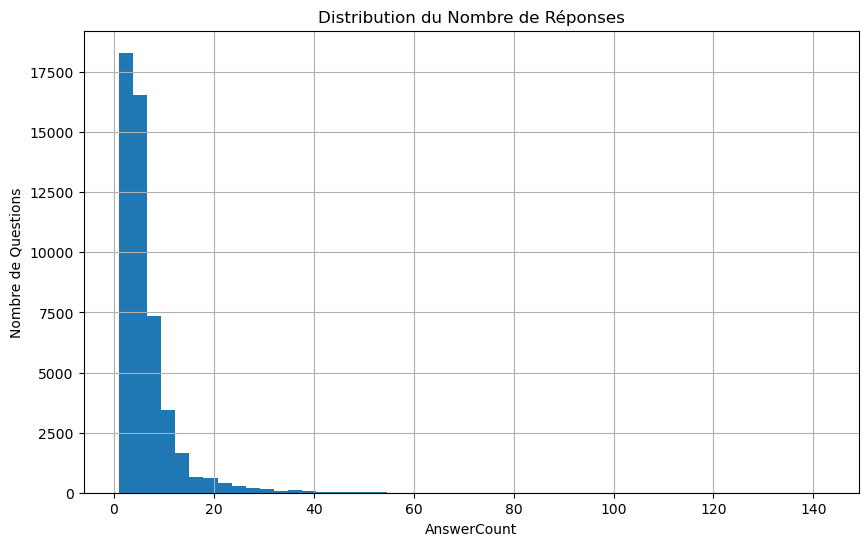

In [32]:

# Distribution des scores
plt.figure(figsize=(10, 6))
df_query['Score'].hist(bins=50)
plt.title('Distribution des Scores')
plt.xlabel('Score')
plt.ylabel('Nombre de Questions')
plt.show()

# Distribution des vues
plt.figure(figsize=(10, 6))
df_query['ViewCount'].hist(bins=50)
plt.title('Distribution des Vues')
plt.xlabel('ViewCount')
plt.ylabel('Nombre de Questions')
plt.show()

# Distribution du nombre de réponses
plt.figure(figsize=(10, 6))
df_query['AnswerCount'].hist(bins=50)
plt.title('Distribution du Nombre de Réponses')
plt.xlabel('AnswerCount')
plt.ylabel('Nombre de Questions')
plt.show()


In [11]:
nlp = spacy.load("en_core_web_sm")

In [33]:
import re
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def process_text(nlp, text, allowed_words=None, unique=False, stemming=False):
    text = re.sub(r'[^a-zA-Z\s\+\-_]', ' ', text)
    doc = nlp(text)
    
    if allowed_words:
        words = [token.lemma_.lower() for token in doc \
                 if not token.is_stop and len(token.text) >= 3 and token.lemma_.lower() in allowed_words]
    else:
        words = [token.lemma_.lower() for token in doc if not token.is_stop and len(token.text) >= 3]

    if stemming:
        stemmed_words = [stemmer.stem(word) for word in words]

    if unique:
        words = list(set(words))

    words = [word for word in words if word.strip()]
    
    return words

## Tester le stemming 

In [34]:
df_query.Tags = df_query.Tags.apply(lambda x: process_text(nlp, x, unique=True, stemming=True))

## Tester la lemmatisation

In [20]:
df_query.Tags = df_query.Tags.apply(lambda x: process_text(nlp, x, unique=True))

In [21]:
df_query.Tags 

0        [c++, performance, prediction, branch, java, c...
1            [control, branch, version, push, git, remote]
2        [c++, operator, code, standard, compliance, fo...
3          [control, version, overwrite, pull, fetch, git]
4        [datum, structure, memory, heap, management, a...
                               ...                        
49995    [machine, cloud, azureportal, azure, virtual, ...
49996    [ajax, validationrule, jquery, validate, javas...
49997    [material, datepicker, reactjs, typescript, ja...
49998           [post, proxy, beautifulsoup, http, python]
49999         [exit, window, file, python-, batch, python]
Name: Tags, Length: 50000, dtype: object

In [22]:
df_query.Tags = df_query['Tags'].apply(lambda x: ' '.join(x))

In [23]:
df_query.Title = df_query.Title.apply(lambda x: process_text(nlp, x))
df_query.Body = df_query.Body.apply(lambda x: process_text(nlp, x))

In [43]:
df_query.Body 

0        [c++, code, sort, datum, time, region, make, p...
1        [fail, attempt, delete, remote, branch, pre, c...
2        [read, href, http, group, google, com, group, ...
3        [force, overwrite, local, file, code, git, pul...
4        [stack, heap, locate, physically, computer, me...
                               ...                        
49995    [microsoft, azure, different, subnet, vnet, az...
49996    [code, work, need, basically, field, length, c...
49997    [recently, start, material, react, typescript,...
49998    [pre, code, import, beautifulsoup, import, req...
49999    [python, script, running, code, want, able, ki...
Name: Body, Length: 50000, dtype: object

In [44]:
df_query.Title = df_query['Title'].apply(lambda x: ' '.join(x))
df_query.Body = df_query['Body'].apply(lambda x: ' '.join(x))

In [46]:
condition = df_query.Title.isna()
df_query.loc[condition, 'Title'] = df_query.loc[condition, 'Body']

condition = df_query.Body.isna()
df_query.loc[condition, 'Body'] = df_query.loc[condition, 'Title']

In [48]:
data = df_query.dropna(subset=['Title', 'Body'])

In [49]:
data.set_index('Id', inplace=True)
data.head()

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
11227809,process sorted array fast process unsorted array,c++ code sort datum time region make primary l...,java prediction c++ branch cpu architecture pe...,27284,1890740,25
2003505,delete git branch locally remotely,fail attempt delete remote branch pre class la...,control git push branch version remote,20374,11680196,41
1642028,operator c++,read href http group google com group comp lan...,c++ standard format compliance operator code,10165,1016567,26
1125968,force git pull overwrite local file,force overwrite local file code git pull code ...,control git pull version fetch overwrite,9710,8669682,54
79923,stack heap,stack heap locate physically computer memory e...,heap dynamic structure memory allocation data ...,9441,1945819,31


In [51]:
data.to_csv('data/df_query.csv', index=False)